## Exploratory Data Analysis 

#### Project Name - Exploratory Data Analysis on  Used_cars price

Aim - Analyze the used car's price and identify the factors influencing the car price using EDA.

#### dataset = https://www.kaggle.com/datasets/sukhmanibedi/cars4u

In [1]:
#Import necessary library to do EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load dataset

UsedCar_df = pd.read_csv('used_cars.csv')

### Basic information

In [3]:
#Check total number of observations and features.

UsedCar_df.shape

(7253, 14)

### Duplicate observation

In [4]:
UsedCar_df.duplicated().sum()

0

#### Observation:
    
We are getting 0. this means their is not a single duplicate observation in our dataset and that is good.

In [5]:
#See top 5 and bottom 5 records

UsedCar_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
UsedCar_df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


#### Observation:
* We can see that the in Mileage feature their is difference in unit.
* We have to convert km/kg to kmpl for all the observations

* Or remove units from Mileage ,Engine Power and New_price.

In [7]:
#Replace km/kg to kmpl

UsedCar_df["Mileage"] = UsedCar_df['Mileage'].str.replace('km/kg' , 'kmpl')

In [8]:
#Replacing units from features
import warnings
warnings.filterwarnings("ignore")

UsedCar_df["Mileage"] = UsedCar_df['Mileage'].str.replace('[^\d.]' ,'')
UsedCar_df['Engine'] = UsedCar_df['Engine'].str.replace('[^\d.]' ,'')
UsedCar_df['Power'] = UsedCar_df['Power'].str.replace('[^\d.]' , '')
UsedCar_df['New_Price'] = UsedCar_df['New_Price'].str.replace('[^\d.]' , '')

UsedCar_df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


#### Observation:
So we have successfully handled the units of Mileage,Engine,Power and New_Price.

In [9]:
#We have to know some basic information about our dataset for better understanding.

UsedCar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


#### Observation:
We have to convert datatypes of Mileage , Engine , Power and New_Price to int/float 
because we can not perform mean,median on string datatype.


### DataType Conversion:

In [10]:
UsedCar_df[['Mileage' , 'Engine' , 'New_Price']] = UsedCar_df[['Mileage' , 'Engine' , 'New_Price']].astype('float')

#### * DataType of Power is not converting through astype() so changed it through apply(pd.to_numeric)

In [11]:
UsedCar_df['Power'] = UsedCar_df['Power'].apply(pd.to_numeric)

In [12]:
UsedCar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


### Missing values

In [13]:
UsedCar_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

####  We have missing values in Mileage , Engine , Power , Seats and New_price.
* Because for this features datatype is object so we have to convert it to integer.
* Beacause we have nan we can not convert datatype.
* So first we have to raplace nan with 0 then convert datatype to int then fill 0 with mean ,median ,mode.

In [14]:
#Calculating total percentage of missing values 

MissingValues_Pct = UsedCar_df.isnull().sum()/len(UsedCar_df.index)*100

In [15]:
print(MissingValues_Pct)

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64


#### Observation:

1. We can see that the some features like Mileage , Engine , Power , Seats , New_Price has missing values.
2. New_Price feature has 86% of missing data followed by Price 7%.

#### We can drop New_Price column because it has more than 85% of missing values

In [16]:
UsedCar_df = UsedCar_df.drop(['New_Price'] , axis = 1)

In [17]:
UsedCar_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Handling Missing Values:

In [18]:
UsedCar_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
Price                1234
dtype: int64

In [19]:
Mileage_mean = UsedCar_df['Mileage'].mean()
Mileage_median = UsedCar_df['Mileage'].median()
Mileage_mode = UsedCar_df['Mileage'].mode()

print(Mileage_mean)
print(Mileage_median)
print(Mileage_mode)

18.141580471659083
18.16
0    17.0
Name: Mileage, dtype: float64


#### Observation:
So we have 0 in Mileage looks like data entry error

In [20]:
#UsedCar_df['Mileage'].replace(0 , np.nan , inplace = True)

In [21]:
UsedCar_df.loc[UsedCar_df['Mileage'] == 0 , 'Mileage']

14      0.0
67      0.0
79      0.0
194     0.0
229     0.0
       ... 
6633    0.0
6697    0.0
6857    0.0
6957    0.0
7226    0.0
Name: Mileage, Length: 81, dtype: float64

#### Observation:
We have zero 81 times in Mileage feature so we have to replace 0's with nan. 

In [22]:
UsedCar_df.loc[UsedCar_df['Mileage'] == 0 , 'Mileage'] = np.nan

In [23]:
#Number of nan

UsedCar_df['Mileage'].isnull().sum()

83

Beacause mean and median are alomost same so we can replace nan with anyone of the central tendency.

In [24]:
#filling nun values with mean

UsedCar_df['Mileage'].fillna(Mileage_mean , inplace = True)

In [25]:
#Check null values

UsedCar_df['Mileage'].isnull().sum()

0

In [26]:
UsedCar_df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [27]:
UsedCar_df.loc[UsedCar_df['Seats'] == 0 , 'Seats']

3999    0.0
Name: Seats, dtype: float64

#### Observation:
* their is some data entry error because we have 0 in seats feature.
* Car seats can not be 0 right.
* so we have to replace 0 with nan then with central tendancy.

In [28]:
#UsedCar_df['Seats'].fillna(value = np.nan , inplace = True)

In [29]:
UsedCar_df.loc[UsedCar_df['Seats'] == 0 , 'Seats'] = np.nan

In [30]:
UsedCar_df['Seats'].isnull().sum()

54

In [31]:
UsedCar_df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.])

In [32]:
Seats_mean  = UsedCar_df['Seats'].mean()

In [33]:
#filling nun values with mean

UsedCar_df['Seats'].fillna(Seats_mean , inplace = True)

In [34]:
UsedCar_df['Seats'].isnull().sum()

0

In [35]:
UsedCar_df.loc[UsedCar_df['Engine'] == 0 , 'Engine']

Series([], Name: Engine, dtype: float64)

No 0 value

In [36]:
Engine_median = UsedCar_df['Engine'].median()

In [37]:
UsedCar_df['Engine'].fillna(Engine_median ,inplace = True)

In [38]:
UsedCar_df['Engine'].isnull().sum()

0

In [39]:
UsedCar_df.loc[UsedCar_df['Power'] == 0 , 'Power']

Series([], Name: Power, dtype: float64)

No 0 value

In [40]:
UsedCar_df['Power'].isnull().sum()

175

In [41]:
Power_median = UsedCar_df['Power'].median()

In [42]:
UsedCar_df['Power'].fillna(Power_median ,inplace = True)

In [43]:
UsedCar_df['Power'].isnull().sum()

0

In [44]:
UsedCar_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

In [45]:
UsedCar_df.loc[UsedCar_df['Price'] == 0 , 'Price']

Series([], Name: Price, dtype: float64)

No 0 value that's good

In [46]:
Price_mean = UsedCar_df['Price'].mean()

In [47]:
UsedCar_df['Price'].fillna(Price_mean , inplace = True)

In [48]:
UsedCar_df['Price'].isnull().sum()

0

In [49]:
UsedCar_df['Price'].isnull().sum()

0

In [50]:
UsedCar_df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### So we have successfully handled missing values for numerical features.

Note-
UsedCar_df['Mileage'] = 0

Do not do this it will change your entire feature to zero.

In [51]:
UsedCar_df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   9
Price                1374
dtype: int64

#### Observation:

We can get unique number of values for each feature.

In [52]:
UsedCar_df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [53]:
UsedCar_df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [54]:
UsedCar_df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

#### Observation:
    
So their is no duplicate values for categorical features.

### Data reduction

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column 'S.No' have only ID values, assuming they don’t have any predictive power to predict the dependent variable i.e. price of the car.

In [55]:
UsedCar_df = UsedCar_df.drop(['S.No.'] , axis = 1)

In [56]:
UsedCar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price              7253 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


### Feature Engineering

#### Feature creation

We have 'Year' that is basically manufacturing price of the car so we can create new feature 'Car_age'
because age of the car is a contributing factor to the car's price.

In [57]:
from datetime import date

UsedCar_df['Car_age'] = date.today().year - UsedCar_df['Year']

In [58]:
UsedCar_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10


#### Feature split

Since car names will not be great predictors of the price in our current data. But we can process this column to extract important information using brand and Model names.

We can create new features like 'Brand' and 'Model' hy substracting from 'Name' feature. 

#Feature split on 'Name'

In [59]:
UsedCar_df['Brand'] = UsedCar_df.Name.str.split().str.get(0)

In [60]:
UsedCar_df['Model'] = UsedCar_df.Name.str.split().str.get(1) + UsedCar_df.Name.str.split().str.get(2)

In [61]:
UsedCar_df[['Name' , 'Brand' , 'Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [62]:
UsedCar_df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,13,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8,Hyundai,Creta1.6


In [63]:
UsedCar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price              7253 non-null   float64
 12  Car_age            7253 non-null   int64  
 13  Brand              7253 non-null   object 
 14  Model              7252 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 850.1+ KB


In [64]:
UsedCar_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_age              0
Brand                0
Model                1
dtype: int64

#### Observation:
    
1. After feature split all the columns looks good.
2. For all the columns datatype is correct.
3. Missing values have taken care for numerical features but we can see that the we have one null value for 
   'Model' feature

print('Total number of unique brand:' , UsedCar_df['Brand'].nunique())

print(UsedCar_df['Brand'].unique())

#Total number of unique brand: 33
#['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']

#### Observation:
    
1. Data entry errors, and some variables may need data type conversion.
2. The brand name ‘Isuzu’ ‘ISUZU’ and ‘Mini’ and ‘Land’ looks incorrect. This needs to be corrected

In [65]:
UsedCar_df['Brand'].replace({'ISUZU':'Isuzu' , 'Mini':'Mini Cooper' , 'Land':'Land Rover'} , inplace = True)

In [66]:
print('Total number of unique brand:' , UsedCar_df['Brand'].nunique())

print(UsedCar_df['Brand'].unique())

Total number of unique brand: 32
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']


### Statistic summary

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [67]:
UsedCar_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.000000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.000000,6500000.00
Mileage,7253.0,18.344182,4.134105,6.40,15.40,18.16,21.100000,33.54
Engine,7253.0,1615.789742,593.475257,72.00,1198.00,1493.00,1968.000000,5998.00
Power,7253.0,112.312448,52.922581,34.20,77.00,94.00,138.030000,616.00
Seats,7253.0,5.280456,0.806308,2.00,5.00,5.00,5.000000,10.00
Price,7253.0,9.479468,10.191695,0.44,3.85,6.75,9.479468,160.00
Car_age,7253.0,9.634634,3.254421,4.00,7.00,9.00,12.000000,27.00


#### Observation:
    
1. We can see that the year's range from 1996 to 2019 which shows that the used cars contain both new models and
   new models cars.
2. Average KM driven is ~58K but we can see that the huge difference between min and max valuse where max value is 650000 KM
   which shows the evidence of outlier.
3. Average seat in a car is 5. seat is an important feature in price contribution.
4. Price is very high for used car which is 160K whereas average price for used cars is 9.5K.here may be an outlier or data 
   entry issue.
   

In [68]:
UsedCar_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7253.0,NaN,NaN,NaN,18.344182,4.134105,6.4,15.4,18.16,21.1,33.54
Engine,7253.0,NaN,NaN,NaN,1615.789742,593.475257,72.0,1198.0,1493.0,1968.0,5998.0
Power,7253.0,NaN,NaN,NaN,112.312448,52.922581,34.2,77.0,94.0,138.03,616.0


### Treating Outliers

<Axes: xlabel='Car_age'>

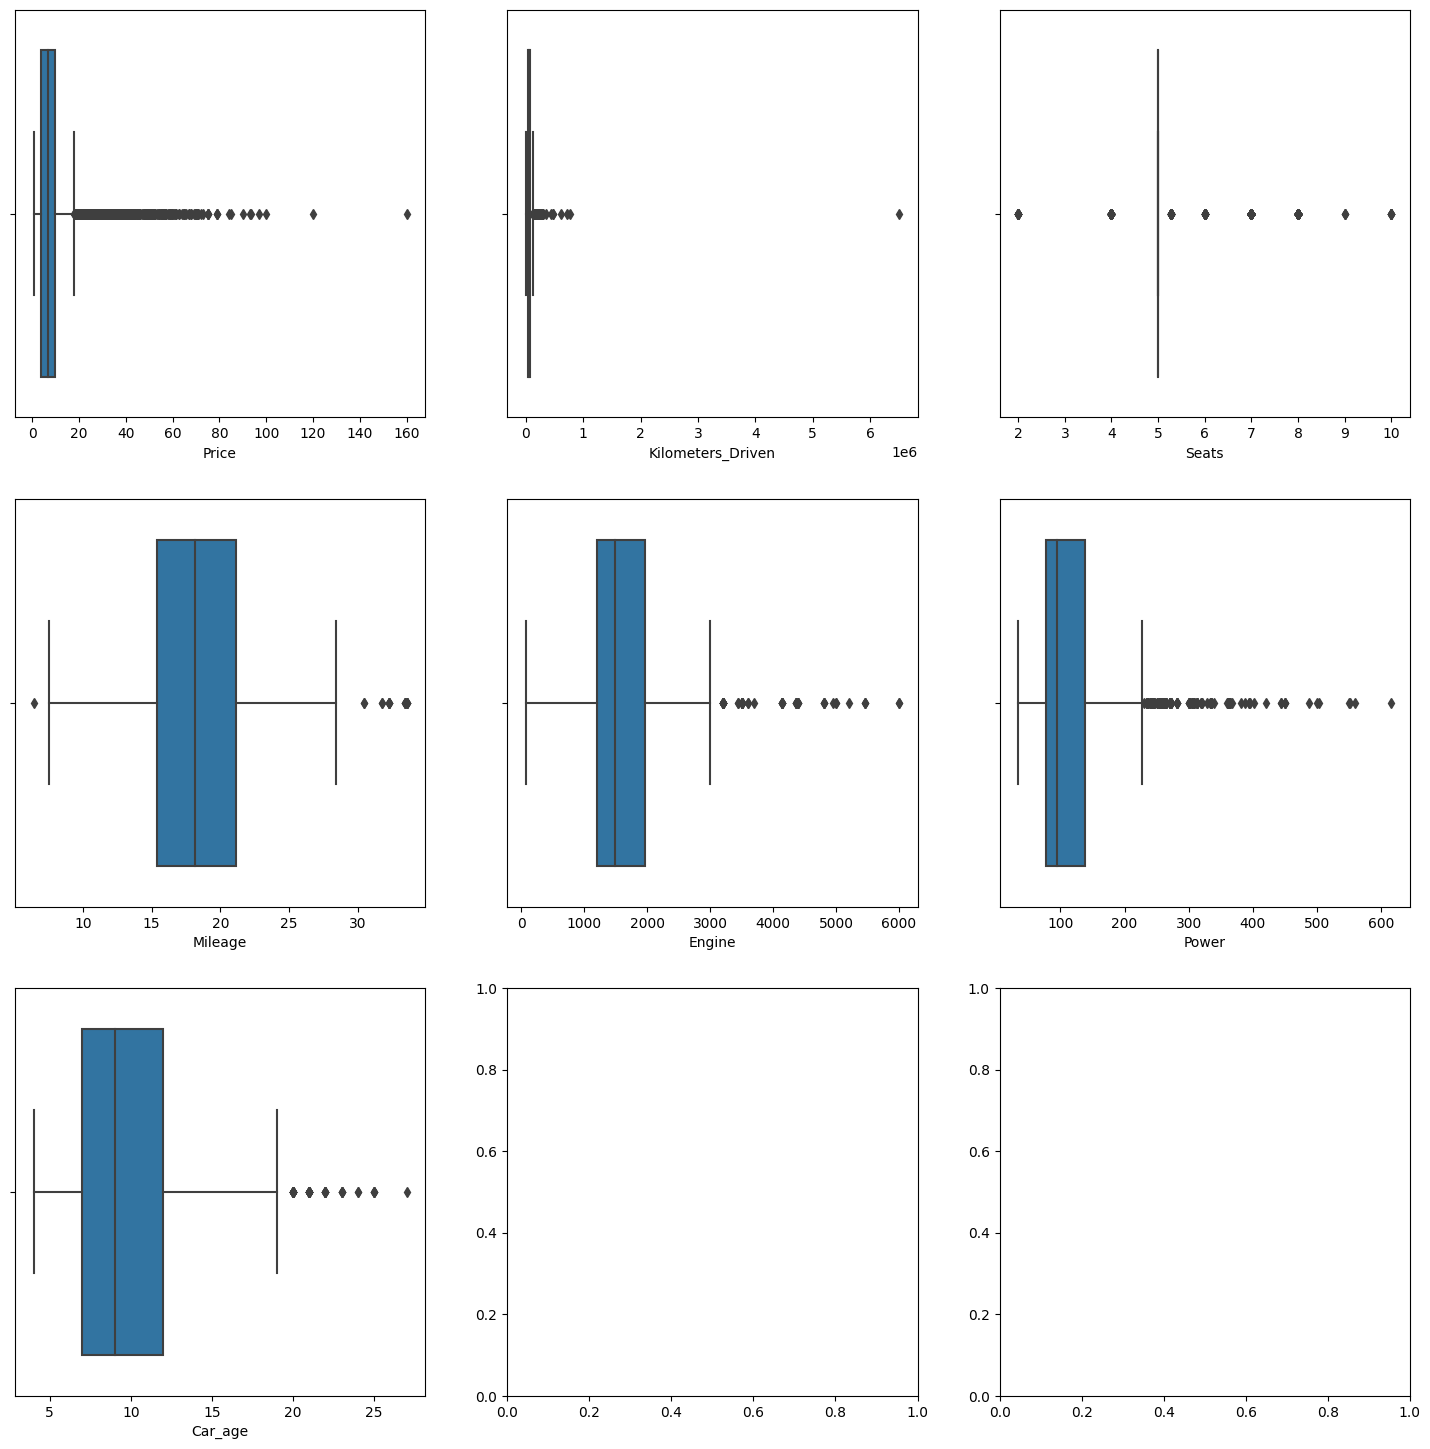

In [178]:
figure ,axes = plt.subplots(3,3 , figsize =(18,18))

sns.boxplot(ax = axes[0,0] ,x = 'Price' , data = UsedCar_df)
sns.boxplot(ax = axes[0,1] , x = 'Kilometers_Driven' , data = UsedCar_df)
sns.boxplot(ax = axes[0,2] , x = 'Seats' , data = UsedCar_df)
sns.boxplot(ax = axes[1,0] , x = 'Mileage' , data = UsedCar_df)
sns.boxplot(ax = axes[1,1] , x = 'Engine' , data = UsedCar_df)
sns.boxplot(ax = axes[1,2] , x = 'Power' , data = UsedCar_df)
sns.boxplot(ax = axes[2,0] , x = 'Car_age' , data = UsedCar_df)

### first method:

In [135]:
Q1 = np.percentile(UsedCar_df['Price'] , 25)
Q3 = np.percentile(UsedCar_df['Price'] , 75)
print('Q1:',Q1)
print('Q3:',Q3)

IQR =Q3-Q1
print('IQR:',IQR)

Q1: 3.85
Q3: 9.47946835022429
IQR: 5.62946835022429


In [136]:
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR

print('upper_bound:',upper_bound)
print('lower_bound:',lower_bound)

upper_bound: 17.923670875560724
lower_bound: -4.594202525336435


### Using function:

In [162]:
def find_outliers_IQR(UsedCar_df):
    Q1 = UsedCar_df.quantile(0.25)
    Q3 = UsedCar_df.quantile(0.75)
    
    IQR = Q3-Q1
    
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    
    outliers = UsedCar_df[((UsedCar_df>upper_bound) | (UsedCar_df<lower_bound))]
    
    return outliers 

In [165]:
outliers = find_outliers_IQR(UsedCar_df['Price'])

print('number of outliers: ', str(len(outliers)))
print('max outlier value: ', str(outliers.max()))
print('min outlier value: ', str(outliers.min()))

number of outliers:  807
max outlier value:  160.0
min outlier value:  17.95


In [166]:
outliers = find_outliers_IQR(UsedCar_df['Kilometers_Driven'])

print('number of outliers: ', str(len(outliers)))
print('max outlier value: ', str(outliers.max()))
print('min outlier value: ', str(outliers.min()))


number of outliers:  258
max outlier value:  6500000
min outlier value:  131503


In [179]:
outliers = find_outliers_IQR(UsedCar_df['Seats'])

print('number of outliers: ', str(len(outliers)))
print('max outlier value: ', str(outliers.max()))
print('min outlier value: ', str(outliers.min()))

number of outliers:  1206
max outlier value:  10.0
min outlier value:  2.0


In [180]:
outliers = find_outliers_IQR(UsedCar_df['Mileage'])

print('number of outliers: ', str(len(outliers)))
print('max outlier value: ', str(outliers.max()))
print('min outlier value: ', str(outliers.min()))

number of outliers:  19
max outlier value:  33.54
min outlier value:  6.4


In [181]:
outliers = find_outliers_IQR(UsedCar_df['Engine'])

print('number of outliers: ', str(len(outliers)))
print('max outlier value: ', str(outliers.max()))
print('min outlier value: ', str(outliers.min()))

number of outliers:  65
max outlier value:  5998.0
min outlier value:  3197.0


In [182]:
outliers = find_outliers_IQR(UsedCar_df['Power'])

print('number of outliers: ', str(len(outliers)))
print('max outlier value: ', str(outliers.max()))
print('min outlier value: ', str(outliers.min()))

number of outliers:  274
max outlier value:  616.0
min outlier value:  231.1


In [183]:
outliers = find_outliers_IQR(UsedCar_df['Car_age'])

print('number of outliers: ', str(len(outliers)))
print('max outlier value: ', str(outliers.max()))
print('min outlier value: ', str(outliers.min()))

number of outliers:  58
max outlier value:  27
min outlier value:  20


#### Observation:
    
*  
*
*
*
*
*
*

#### Lets separate Numerical and categorical features 

In [69]:
#Categorical features

Cat_features = UsedCar_df.select_dtypes(include = ['object']).columns

print('Number of categorical features:')
print(Cat_features.nunique())

print('Categorical features:')
print(Cat_features)

Number of categorical features:
7
Categorical features:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')


In [70]:
#Numerical features

Num_features = UsedCar_df.select_dtypes(include = np.number).columns

print('Number of numerical features:')
print(Num_features.nunique())

print('Numerical features:')
print(Num_features)

Number of numerical features:
8
Numerical features:
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Car_age'],
      dtype='object')


#### Observation:
    
1. Categorical features = 7
2. Numerical features = 8

In [192]:
Usedcar_df_num_features = UsedCar_df.select_dtypes(include=np.number)

Usedcar_df_num_features

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_age
0,2010,72000,26.60,998.0,58.16,5.0,1.750000,13
1,2015,41000,19.67,1582.0,126.20,5.0,12.500000,8
2,2011,46000,18.20,1199.0,88.70,5.0,4.500000,12
3,2012,87000,20.77,1248.0,88.76,7.0,6.000000,11
4,2013,40670,15.20,1968.0,140.80,5.0,17.740000,10
...,...,...,...,...,...,...,...,...
7248,2011,89411,20.54,1598.0,103.60,5.0,9.479468,12
7249,2015,59000,17.21,1197.0,103.60,5.0,9.479468,8
7250,2012,28000,23.08,1461.0,63.10,5.0,9.479468,11
7251,2013,52262,17.20,1197.0,103.60,5.0,9.479468,10


In [191]:
Usedcar_df_cat_features = UsedCar_df.select_dtypes(include=['object'])

Usedcar_df_cat_features

,Name,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,Petrol,Manual,First,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,Audi,A4New
...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,Diesel,Manual,First,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Mumbai,Petrol,Automatic,First,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Kolkata,Diesel,Manual,First,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Pune,Petrol,Automatic,Third,Volkswagen,PoloGT


### Univariate Analysis

Analyzing/visualizing the dataset by taking one variable at a time:

1. Univariate analysis can be done for both Categorical and Numerical variables.
2. Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.
3. Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

* In our dataset, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.
* A histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

In [71]:
Num_features

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Car_age'],
      dtype='object')

Year
skew: -0.84


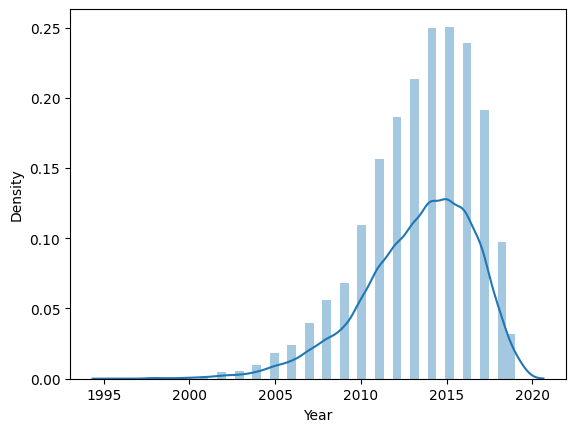

Kilometers_Driven
skew: 61.58


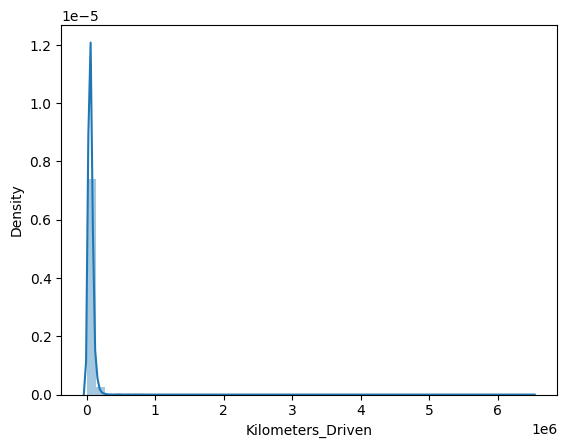

Mileage
skew: 0.21


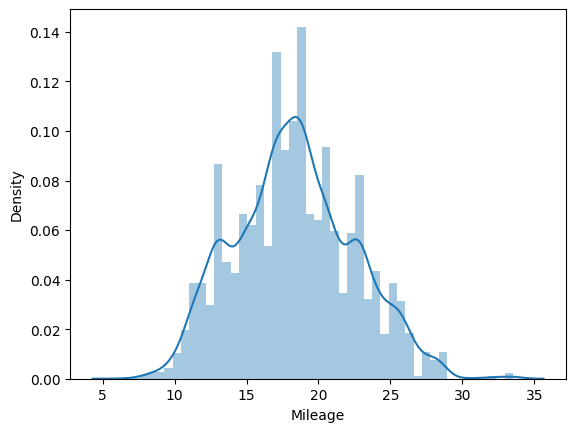

Engine
skew: 1.42


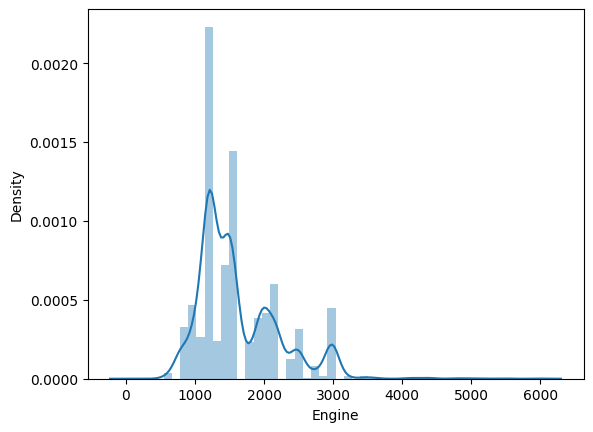

Power
skew: 2.0


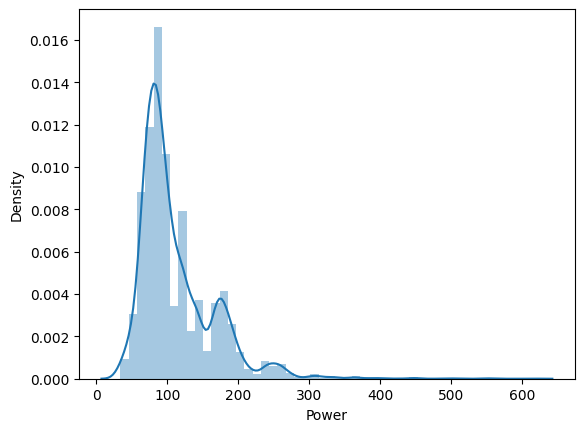

Seats
skew: 1.96


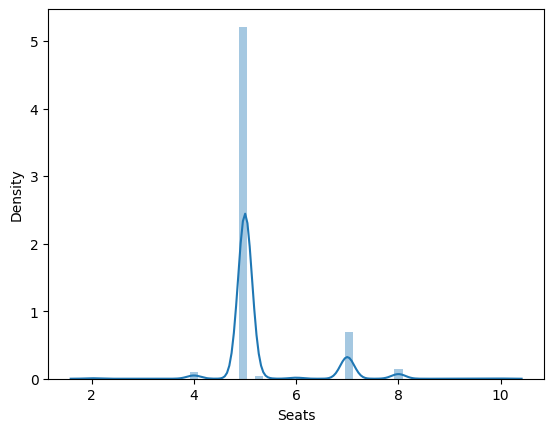

Price
skew: 3.66


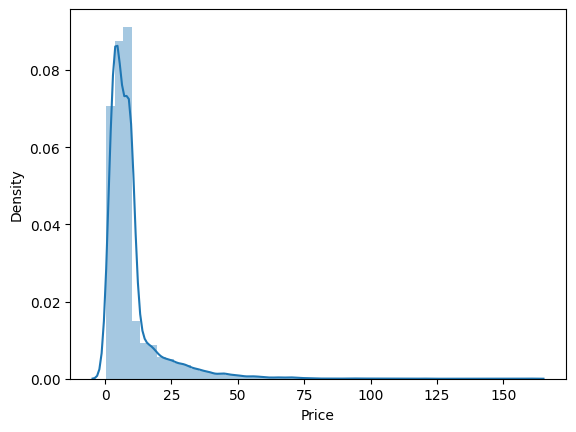

Car_age
skew: 0.84


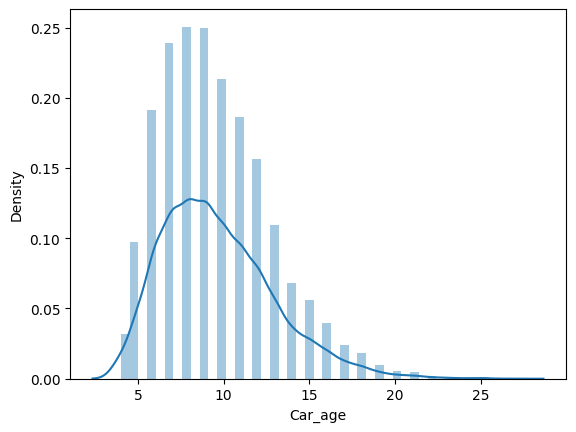

In [72]:
for col in Num_features:
    print(col)
    print('skew:' , round(UsedCar_df[col].skew() ,2))

    plt.figure()
    sns.distplot(UsedCar_df[col])
    plt.show()

#### Observation:
    
All the numerical features have skewness so we just don't reduce skewness from all the columns 
first check correlation of features with target feature which is Price.

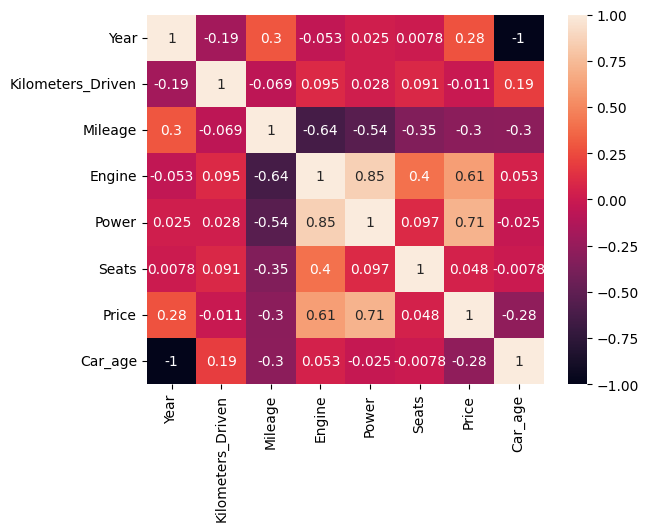

In [73]:
#Check Correlation between features

sns.heatmap(UsedCar_df.corr(),annot = True)
plt.show()

#### Observation:
    
* Price has good correlation with year,Mileage,Engine,Power and car_age variabel
  but bad correlation with Kilometers_Driven and seats.
* so we have to transform or reduce skewness from Kilometers_Driven and seats 

#### Handling skewness

#### Handling right skewness

* log transformation
* Root Transformation - 
square root transformation
 and Cube root transformatoin
* reciprocals transformation

In [74]:
#log transformation for Kilometers_Driven

log_kilometers_Driven = np.log(UsedCar_df['Kilometers_Driven'])

In [75]:
log_kilometers_Driven.skew()

-1.298771488065216

<Axes: xlabel='Kilometers_Driven', ylabel='Density'>

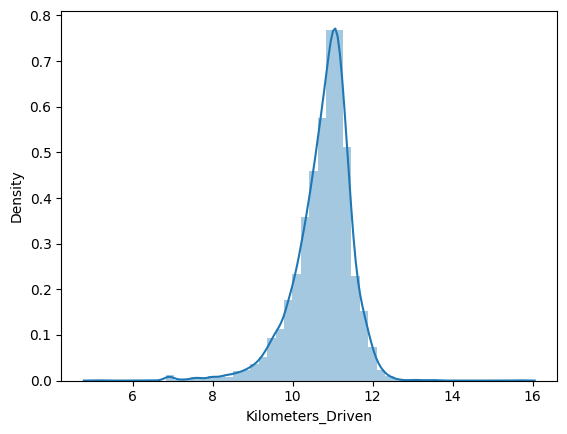

In [76]:
sns.distplot(log_kilometers_Driven , hist = True)

In [77]:
#Root transformation

sqrt_kilometers_driven = np.sqrt(UsedCar_df['Kilometers_Driven'])

In [78]:
sqrt_kilometers_driven.skew()

4.258743885144229

<Axes: xlabel='Kilometers_Driven', ylabel='Density'>

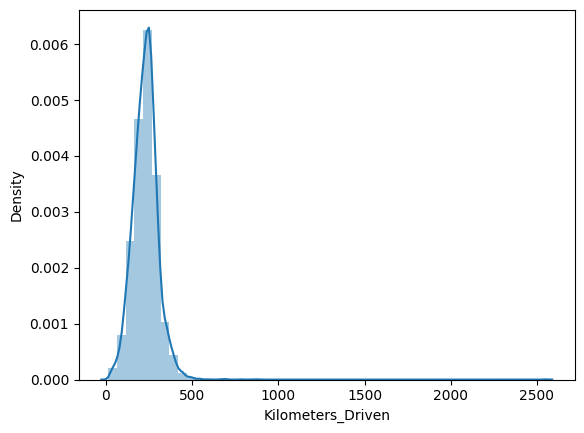

In [79]:
sns.distplot(sqrt_kilometers_driven , hist = True)

In [80]:
cube_root_kilometers = np.cbrt(UsedCar_df['Kilometers_Driven'])

In [81]:
cube_root_kilometers.skew()

0.8091854769170451

<Axes: xlabel='Kilometers_Driven', ylabel='Density'>

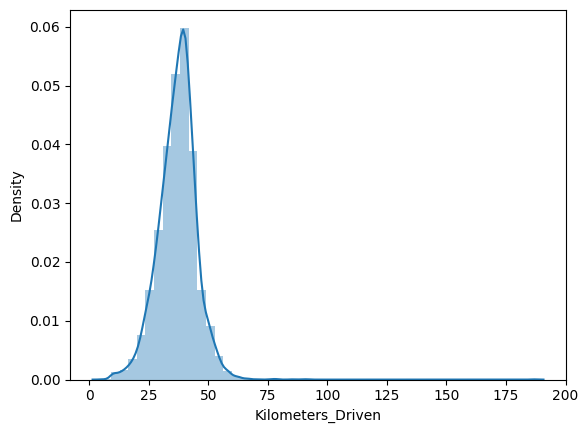

In [82]:
sns.distplot(cube_root_kilometers , hist = True)

#### Observation:  Kilometers_driven
   
After applying multiple skewness technique we can see that the cube root transformation gives us more moderately skewed data.

In [83]:
#log transformation for Seats

log_seats = np.log(UsedCar_df['Seats'])

In [84]:
log_seats.skew()

0.864628447046855

<Axes: xlabel='Seats', ylabel='Density'>

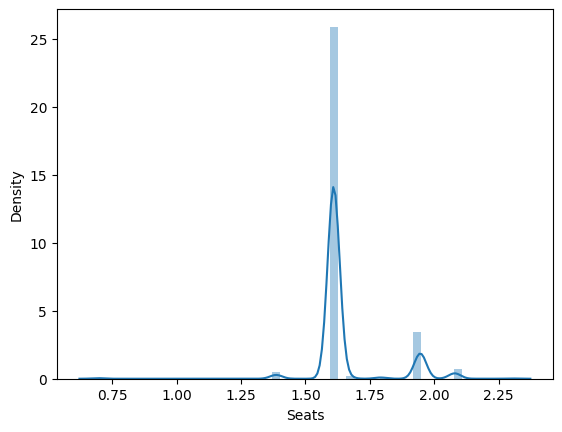

In [85]:
sns.distplot(log_seats ,hist = True)

#### Observation: Seats
So we have successfully handle the skewness for seats from 1.96 to 0.86

#### Note

  It's giving nan because log transformation doesn't work whenever their is nan.
  so for that we have to convert nan to 0.01 or 0.001.

#### categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price

In [86]:
#Categorical features

Cat_features

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

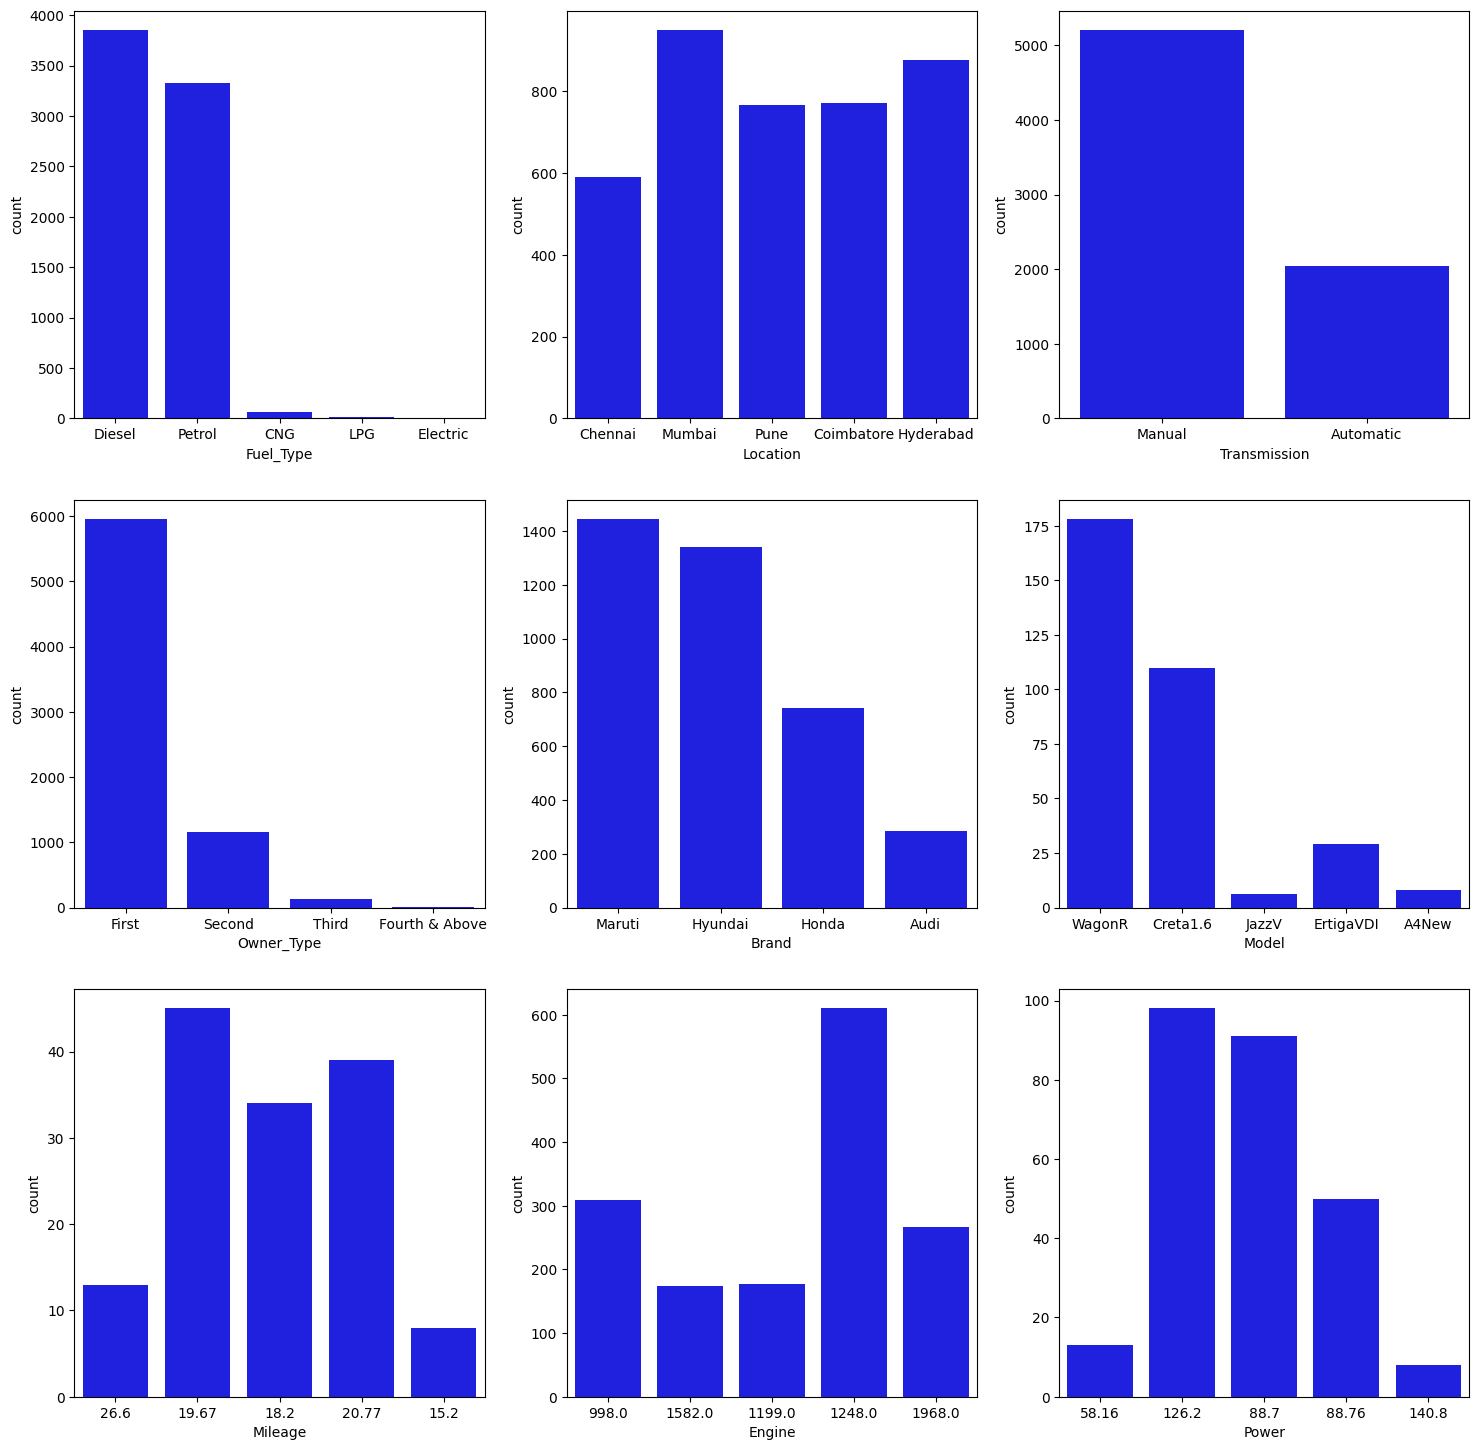

In [87]:
figure ,axes = plt.subplots(3,3 , figsize =(18,18))
sns.countplot(ax = axes[0,0],x = 'Fuel_Type', data = UsedCar_df , order = UsedCar_df['Fuel_Type'].value_counts().index , color = 'blue')

sns.countplot(ax= axes[0,1],x = 'Location', data = UsedCar_df , order = UsedCar_df['Location'].head(6).value_counts().index , color = 'blue')

sns.countplot(ax = axes[0,2],x = 'Transmission', data = UsedCar_df , order = UsedCar_df['Transmission'].value_counts().index , color = 'blue')

sns.countplot(ax= axes[1,0],x = 'Owner_Type', data = UsedCar_df , order = UsedCar_df['Owner_Type'].value_counts().index , color = 'blue')

sns.countplot(ax= axes[1,1],x = 'Brand', data = UsedCar_df , order = UsedCar_df['Brand'].head(5).value_counts().index , color = 'blue')

sns.countplot(ax= axes[1,2],x = 'Model', data = UsedCar_df , order = UsedCar_df['Model'].head(5).value_counts().index , color = 'blue')

sns.countplot(ax= axes[2,0],x = 'Mileage', data = UsedCar_df , order = UsedCar_df['Mileage'].head(5).value_counts().index , color = 'blue')

sns.countplot(ax= axes[2,1],x = 'Engine', data = UsedCar_df , order = UsedCar_df['Engine'].head(5).value_counts().index , color = 'blue')

sns.countplot(ax= axes[2,2],x = 'Power', data = UsedCar_df , order = UsedCar_df['Power'].head(5).value_counts().index , color = 'blue')

plt.show()

#### Observation:
    
* We can see that the customers are buying large number of diesel cars followed by petrol cars.
* Location - Mumbai follwed by hyderabad then coimbatore
* In terms of transmission large number of buyers prefer mannual cars over automatic cars.
* People prefer buying first hand car over second hand.
* Maruti is the most demand car follwed by hyundai.
* Customers are buying WagonR most of the time.
* In terms of Engine people buying - 1248cc.

### Bivariate Analysis

Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

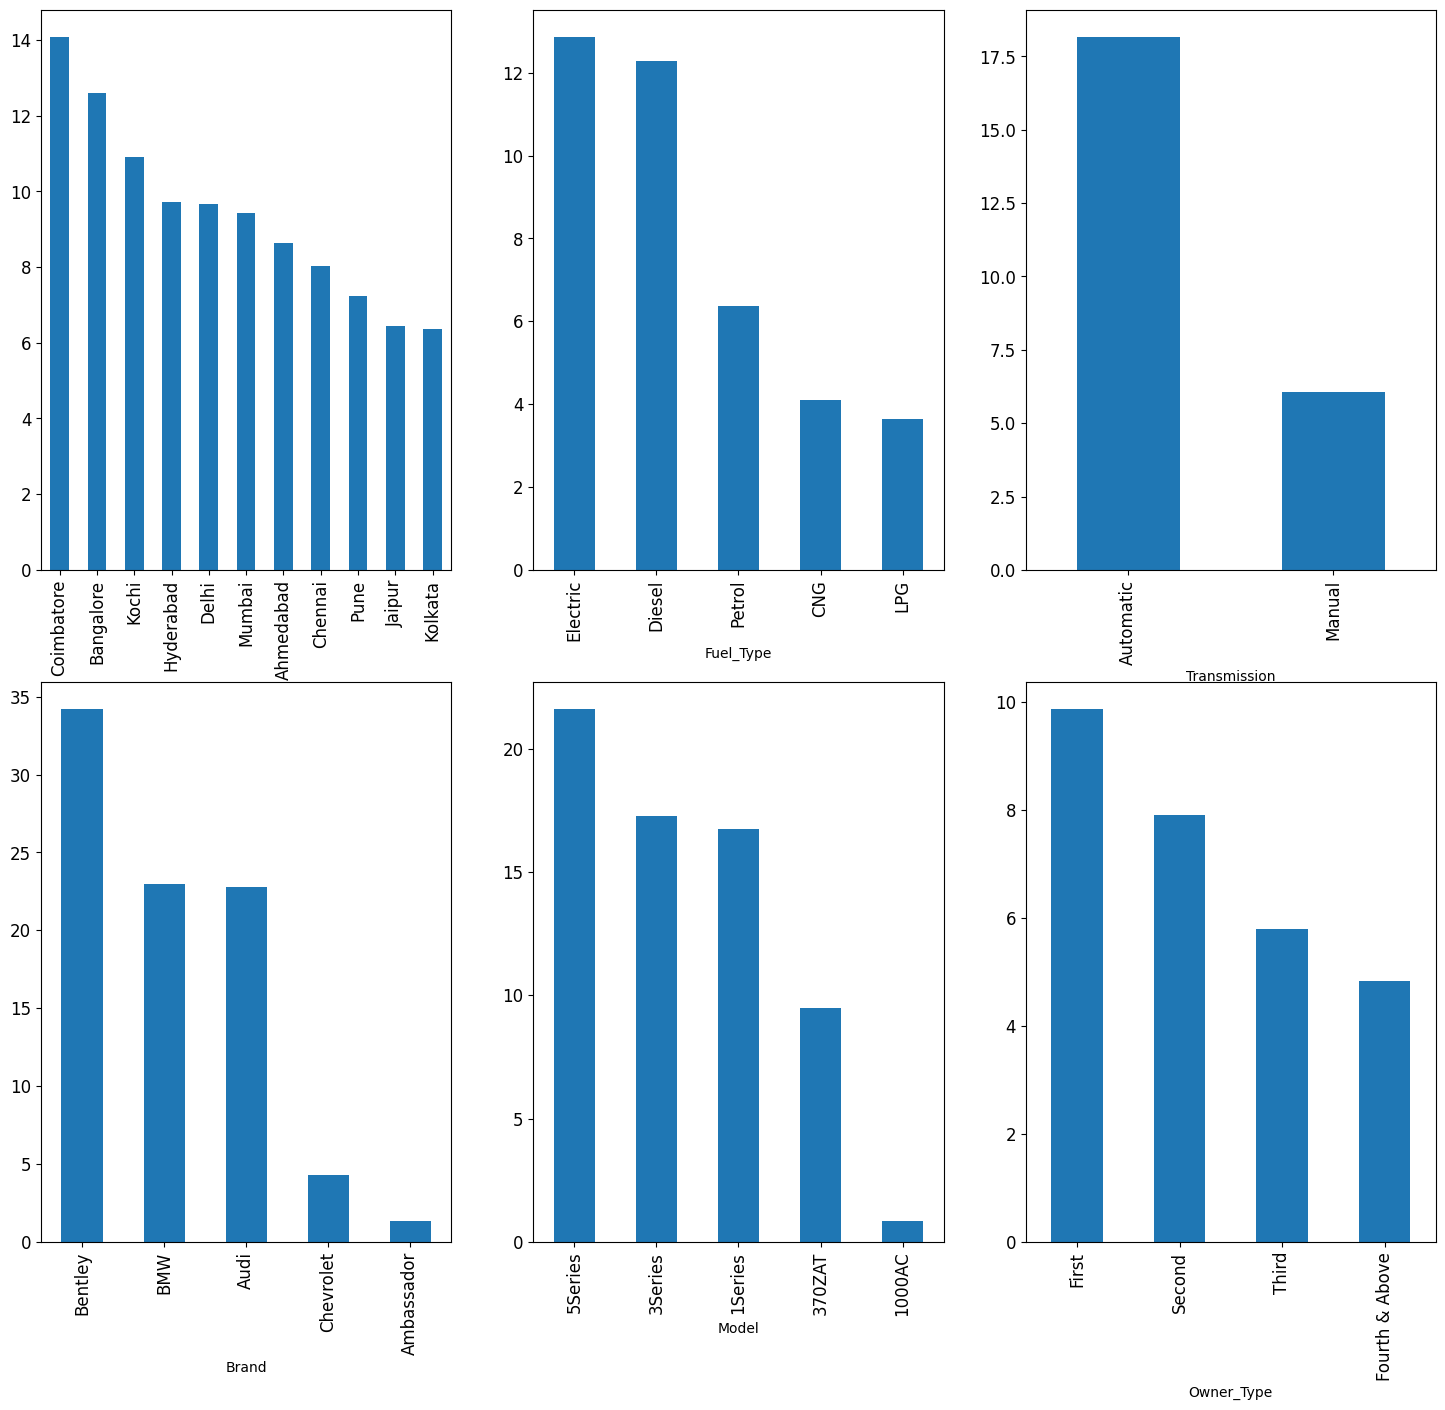

In [88]:
#A bar plot can be used to show the relationship between Categorical variables and continuous variables


fig, axarr = plt.subplots(2,3 ,figsize=(18,16))

UsedCar_df.groupby('Location')['Price'].mean().sort_values(ascending=False).plot.bar(ax= axarr[0,0],fontsize=12)

UsedCar_df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax= axarr[0,1] ,fontsize=12)

UsedCar_df.groupby('Transmission')['Price'].mean().sort_values(ascending=False).plot.bar(ax= axarr[0,2] ,fontsize=12)

UsedCar_df.groupby('Brand')['Price'].mean().head(5).sort_values(ascending=False).plot.bar(ax= axarr[1,0] ,fontsize=12)

UsedCar_df.groupby('Model')['Price'].mean().head(5).sort_values(ascending=False).plot.bar(ax= axarr[1,1] ,fontsize=12)

UsedCar_df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax= axarr[1,2] ,fontsize=12)

plt.show()

#### Observation:
    
* Prices are very high in cities like coimbatore followed by banglore then kochi.
* For electric cars prices are more.
* Automatic cars are more expensive than mannual cars.
* We can see that the most expensive brand is Bentley.